<a href="https://colab.research.google.com/github/swapnilwangane123/Personal_Diary_App/blob/main/IPL_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving deliveries.csv to deliveries (1).csv
Saving matches.csv to matches (1).csv


In [ ]:
dm = pd.read_csv('/content/deliveries (1).csv')

In [ ]:
dl = pd.read_csv('/content/deliveries (1).csv')

In [ ]:
# 1️⃣ Most consistent team (most wins)
team_wins = dm['winner'].value_counts()
most_consistent_team = team_wins.idxmax()
print("Most consistent team:", most_consistent_team)
print(team_wins.head())


Most consistent team: Mumbai Indians
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Name: count, dtype: int64


In [ ]:
# 2️⃣ Player who contributed most to victories
player_contribution = dm['player_of_match'].value_counts()
top_player = player_contribution.idxmax()
print("\nPlayer contributing most to victories:", top_player)
print(player_contribution.head())


Player contributing most to victories: AB de Villiers
player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
Name: count, dtype: int64


In [ ]:
# 3️⃣ Importance of toss
toss_winner_wins = (dm['toss_winner'] == dm['winner']).sum()
toss_win_rate = toss_winner_wins / len(dm) * 100
print(f"\nToss-winning team also wins {toss_win_rate:.2f}% of matches.")


Toss-winning team also wins 50.59% of matches.


In [ ]:
# 4️⃣ Venue analysis: batting vs bowling advantage
venue_result = dm.groupby('venue')['result'].count().reset_index(name='matches_played')

# Determine win type
dm['win_type'] = dm['result'].apply(
    lambda x: 'batting_first' if x == 'runs' else ('chasing' if x == 'wickets' else 'other')
)

venue_win_type = dm.groupby(['venue', 'win_type']).size().unstack(fill_value=0)
venue_win_type['total'] = venue_win_type.sum(axis=1)
venue_win_type['batting_win_%'] = (venue_win_type['batting_first'] / venue_win_type['total']) * 100
venue_win_type['chasing_win_%'] = (venue_win_type['chasing'] / venue_win_type['total']) * 100

print("\nVenue performance summary:")
print(venue_win_type[['batting_win_%', 'chasing_win_%']].sort_values('batting_win_%', ascending=False).head(10))


Venue performance summary:
win_type                                            batting_win_%  \
venue                                                               
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...     100.000000   
Maharashtra Cricket Association Stadium, Pune           76.923077   
Himachal Pradesh Cricket Association Stadium, D...      75.000000   
Buffalo Park                                            66.666667   
Vidarbha Cricket Association Stadium, Jamtha            66.666667   
Barsapara Cricket Stadium, Guwahati                     66.666667   
MA Chidambaram Stadium, Chepauk                         62.500000   
Subrata Roy Sahara Stadium                              62.500000   
Brabourne Stadium                                       60.000000   
Kingsmead                                               60.000000   

win_type                                            chasing_win_%  
venue                                                              
Dr. Y.S

In [ ]:
# --- Step 1: Filter last 5 years of data ---
# Assuming 'season' column exists in matches.csv
latest_season = dm['season'].max()
last_5_years = list(range(latest_season - 4, latest_season + 1))
matches_5yr = dm[dm['season'].isin(last_5_years)]
match_ids_5yr = matches_5yr['id'].unique()
deliveries_5yr = dl[dl['match_id'].isin(match_ids_5yr)]

KeyError: 'season'

In [ ]:
# Calculate total runs by each batsman
batsman_stats = dl.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count',
    'dismissal_kind': lambda x: (x != 'nan').sum()
}).reset_index()

batsman_stats.rename(columns={'batsman_runs': 'Runs', 'ball': 'Balls'}, inplace=True)
print(batsman_stats)

             batter  Runs  Balls  dismissal_kind
0    A Ashish Reddy   280    196             196
1          A Badoni   634    505             505
2        A Chandila     4      7               7
3          A Chopra    53     75              75
4       A Choudhary    25     20              20
..              ...   ...    ...             ...
668   Yashpal Singh    47     67              67
669     Younis Khan     3      7               7
670   Yudhvir Singh    22     16              16
671    Yuvraj Singh  2754   2207            2207
672          Z Khan   117    141             141

[673 rows x 4 columns]


             batter  Runs  Balls  Strike Rate    Average
631         V Kohli  8014   6236   128.511867  36.761468
512        S Dhawan  6769   5483   123.454313  34.891753
477       RG Sharma  6630   5183   127.918194  28.577586
147       DA Warner  6567   4849   135.429986  40.042683
546        SK Raina  5536   4177   132.535312  32.952381
374        MS Dhoni  5243   3947   132.835065  35.187919
30   AB de Villiers  5181   3487   148.580442     41.448
124        CH Gayle  4997   3516   142.121729  39.039062
501      RV Uthappa  4954   3927   126.152279  26.923913
282      KD Karthik  4843   3687   131.353404  25.624339


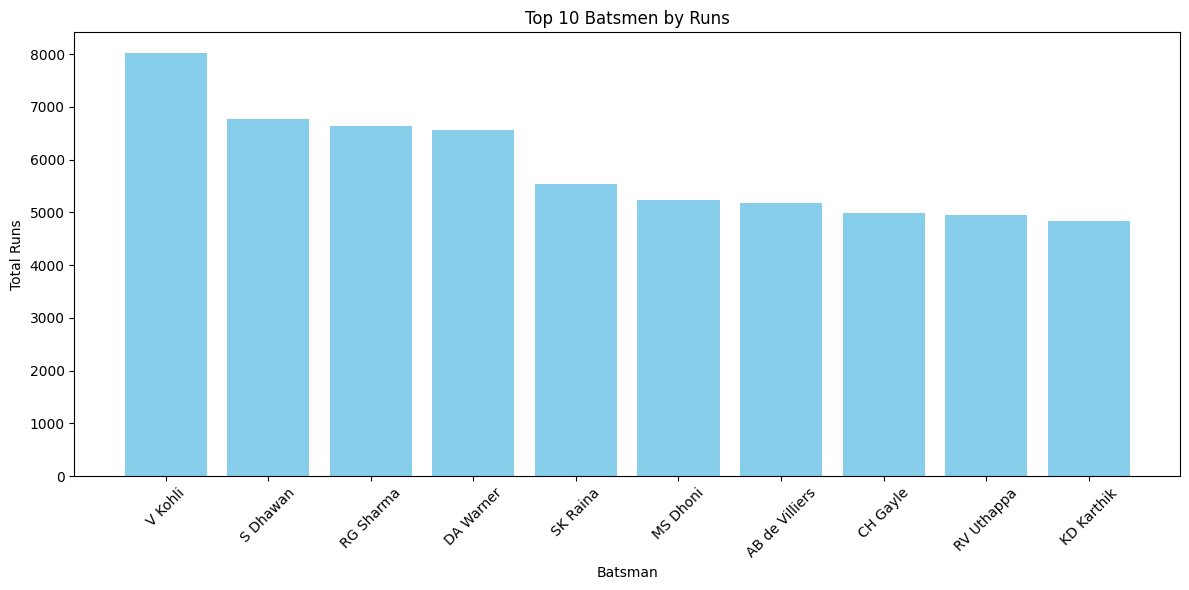

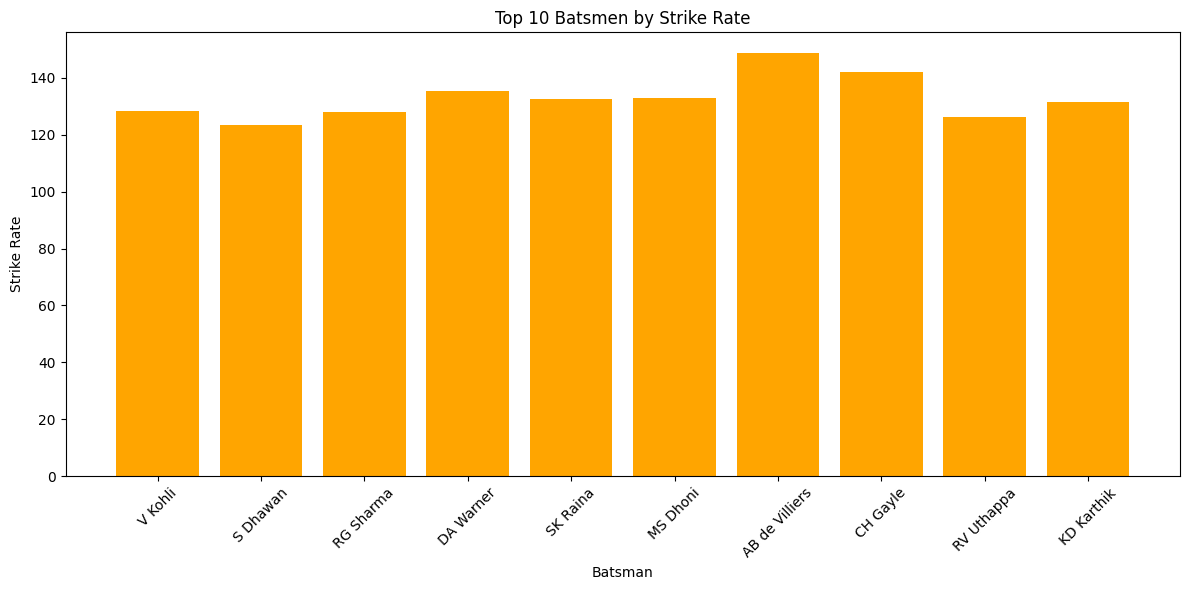

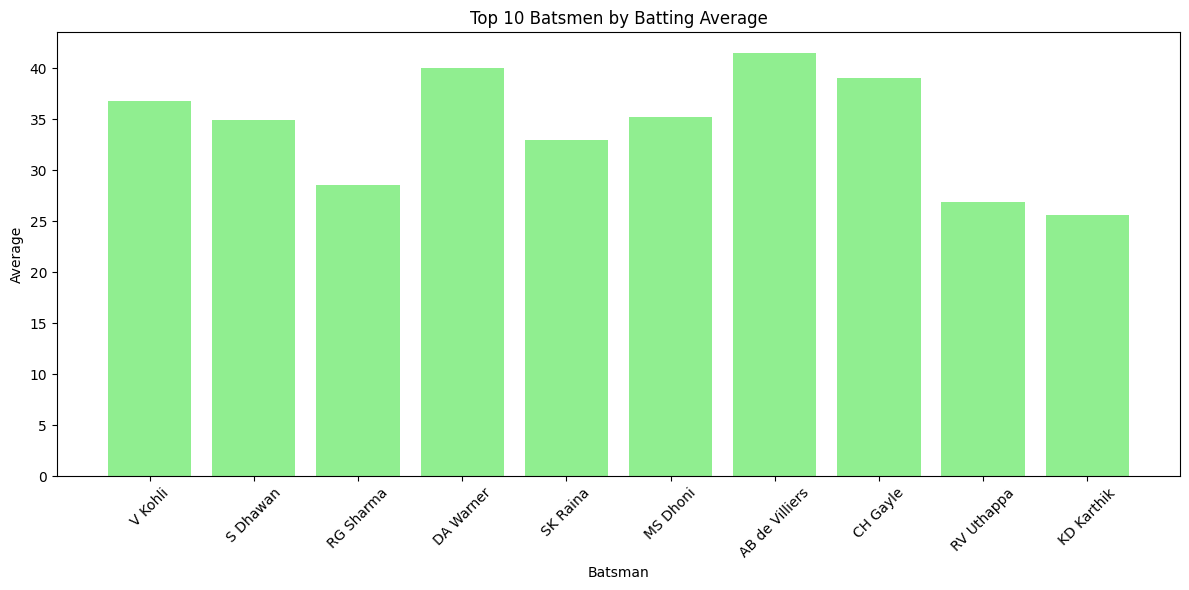

In [ ]:
batsman_stats = dl.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count',
    'dismissal_kind': lambda x: x.notna().sum()
}).reset_index()

batsman_stats.rename(columns={'batsman_runs': 'Runs', 'ball': 'Balls'}, inplace=True)

# Calculate Strike Rate and Average
batsman_stats['Strike Rate'] = (batsman_stats['Runs'] / batsman_stats['Balls']) * 100
batsman_stats['Average'] = batsman_stats['Runs'] / batsman_stats['dismissal_kind'].replace(0, pd.NA)

# Sort by Runs for top 10
top_batsmen = batsman_stats.sort_values(by='Runs', ascending=False).head(10)

print(top_batsmen[['batter', 'Runs', 'Balls', 'Strike Rate', 'Average']])

# --- CHARTS ---

# 1️⃣ Top 10 Batsmen by Runs
plt.figure(figsize=(12,6))
plt.bar(top_batsmen['batter'], top_batsmen['Runs'], color='skyblue')
plt.title("Top 10 Batsmen by Runs")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ Top 10 Batsmen by Strike Rate
plt.figure(figsize=(12,6))
plt.bar(top_batsmen['batter'], top_batsmen['Strike Rate'], color='orange')
plt.title("Top 10 Batsmen by Strike Rate")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3️⃣ Top 10 Batsmen by Batting Average
plt.figure(figsize=(12,6))
plt.bar(top_batsmen['batter'], top_batsmen['Average'], color='lightgreen')
plt.title("Top 10 Batsmen by Batting Average")
plt.xlabel("Batsman")
plt.ylabel("Average")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()